# Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

> #### Objective: Building a multiple linear regression model for the prediction of demand for shared bikes

It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
print("below code was made with below versions")
print("pandas version: " + pd.__version__)
print("numpy version: " + np.__version__)
from matplotlib import __version__ as mt_version #type:ignore
print("matplotlib version: " + mt_version) #type:ignore
print("seaborn version: " + sns.__version__) #type:ignore
from sklearn import __version__ as sk_version
print("scikit-learn version: " + sk_version)
from statsmodels import __version__ as sm_version
print("statsmodels version: " + sm_version)


below code was made with below versions
pandas version: 2.1.1
numpy version: 1.24.3
matplotlib version: 3.8.0
seaborn version: 0.13.2
scikit-learn version: 1.3.0
statsmodels version: 0.14.1


# data understanding


In [154]:
df = pd.read_csv("./day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [155]:
# check number of data points and columns
df.shape

(730, 16)

In [156]:
# get summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


all data types are identified correctly except date column which is not useful in current analysis

In [157]:
# get summary statistics of  about data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [158]:
# missing values count
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

no missing values, good data

In [159]:
# find duplicates if any
df.duplicated().sum()

0

no missing and duplicate values

### data description
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Traget variable is 'cnt' 
- count of total rental bikes including both casual and registered

<Axes: ylabel='cnt'>

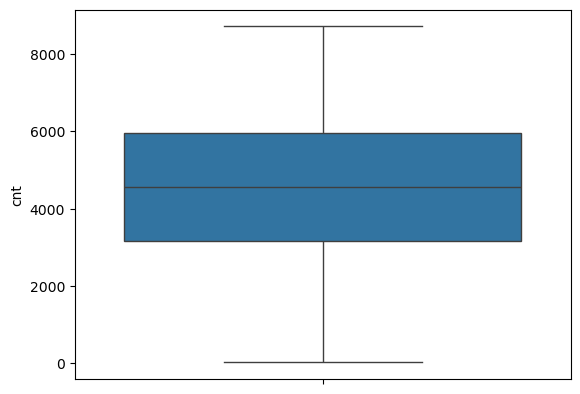

In [160]:
sns.boxplot(y=df['cnt']) #type: ignore

# Data cleaning and Manipulation

#### mapping data for categorical columns

In [161]:
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['yr'] = df['yr'].map({0:'2018', 1:'2019'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'}) # used short decription, detailed desciption is mentioned above

#### dropping the columns which are not required

- dteday : date is not useful in linear regression. all relevant columns are already extracted from this such as month, weekday, year.
- casual, registered : they are not features as they are part of target variable.
- instant : it is id, not useful for analysis

In [162]:
# dropping them
df.drop(columns=['dteday', 'casual', 'registered', 'instant'], inplace=True)

In [163]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [164]:
# defining arrays based on data type
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

## outliers

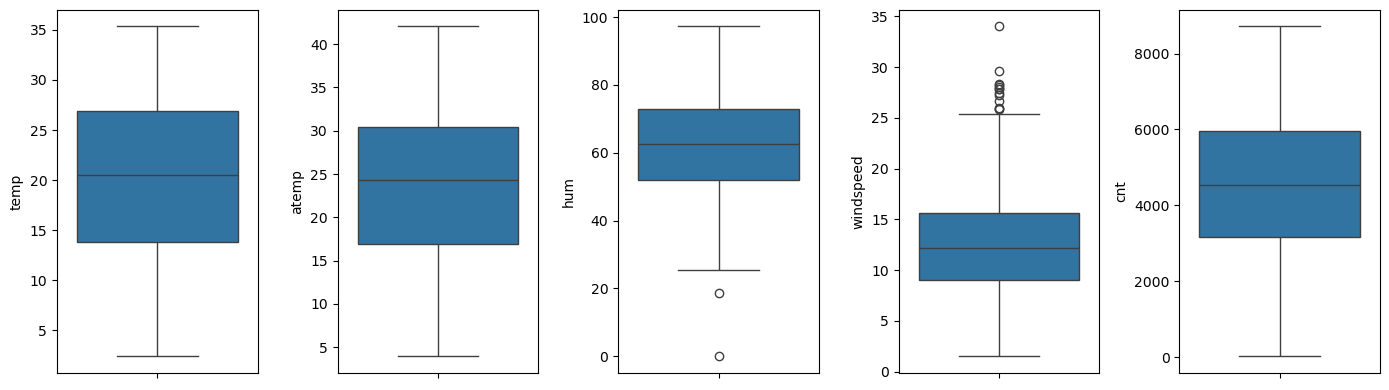

In [165]:
# boxplots for numerical columns
plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(data=df, y=col)
    plt.tight_layout()
plt.show()

There are outliers in wind speeed and humidity

In [166]:
# printing percentile values
for col in df[num_cols]:
    print(f"{col} | min: {df[col].min()} | max: {df[col].max()} | 0.1%le: {df[col].quantile(0.001).round(2)} |  99.9%le: {df[col].quantile(0.999).round(2)}") #type:ignore

temp | min: 2.4243464 | max: 35.328347 | 0.1%le: 3.54 |  99.9%le: 34.95
atemp | min: 3.95348 | max: 42.0448 | 0.1%le: 4.67 |  99.9%le: 41.52
hum | min: 0.0 | max: 97.25 | 0.1%le: 13.7 |  99.9%le: 97.1
windspeed | min: 1.5002439 | max: 34.000021 | 0.1%le: 2.47 |  99.9%le: 30.78
cnt | min: 22 | max: 8714 | 0.1%le: 320.16 |  99.9%le: 8598.09


In [167]:
# checking percentage of values outside 0.1% to 99.9%
((df[num_cols] > df[num_cols].quantile(0.999)) | (df[num_cols] < df[num_cols].quantile(0.001))).sum() / df.shape[0] * 100

temp         0.273973
atemp        0.273973
hum          0.273973
windspeed    0.273973
cnt          0.273973
dtype: float64

0.27% is negligible, it can be dropped

In [168]:
# original
df.shape

(730, 12)

In [169]:
# dropping outliers 
for col in num_cols:
    df = df[df[col] < df[col].quantile(0.999)]
    df = df[df[col] > df[col].quantile(0.001)]

In [170]:
# data shape after dropping
df.shape

(720, 12)

only 10 rows (0.27%) is dropped after outlier checks

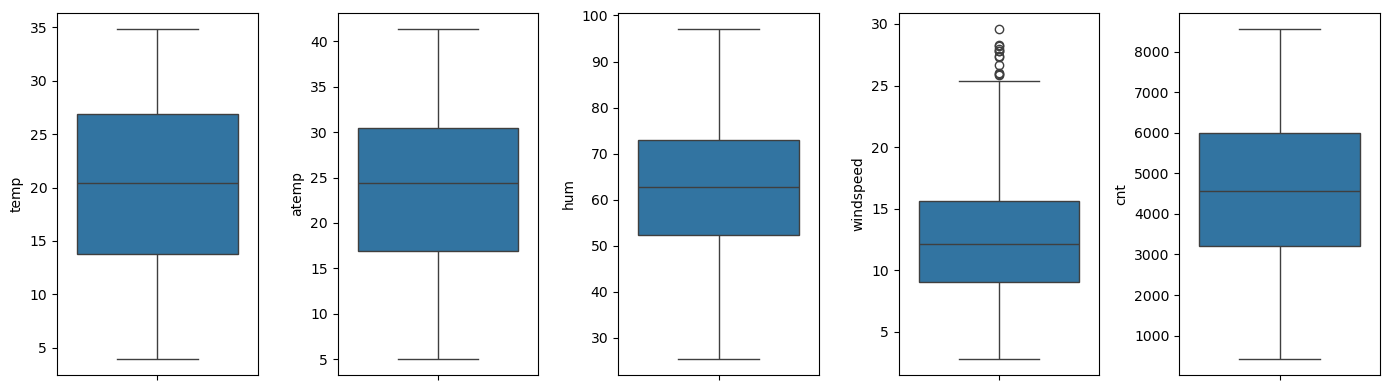

In [171]:
# rechecking box plots
plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(data=df, y=col)
    plt.tight_layout()
plt.show()

not dropping remaining values as they loooks like continuous stream

# Data understanding through graphs

### univariate analysis

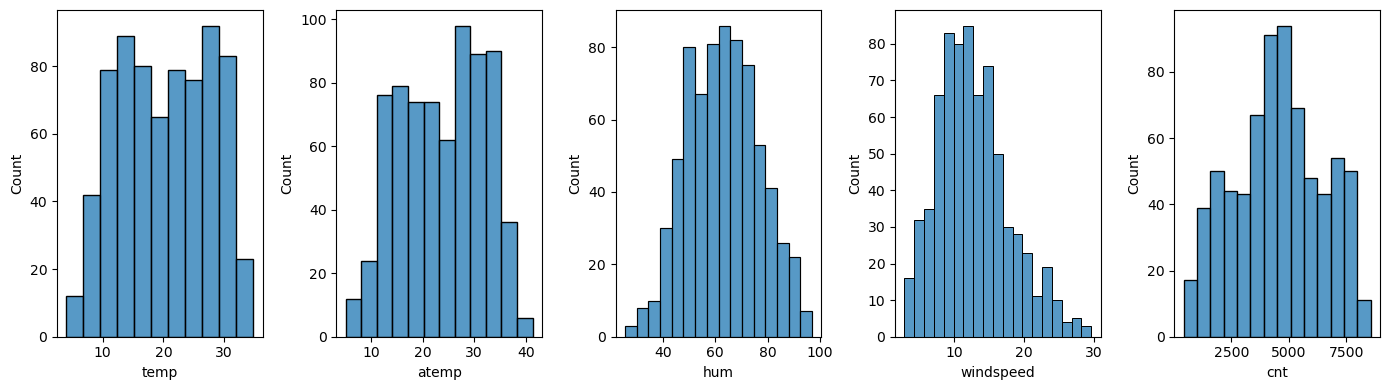

In [172]:
#### histogram for numerical columns
plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,5,i+1)
    sns.histplot(data=df, x=col)
    plt.tight_layout()
plt.show()

Observations: 
> - temp and atemp follows similar distribution, may need to drop one of them.
> - windspeed is right skewed
> - hum, cnt are close to normal distribution

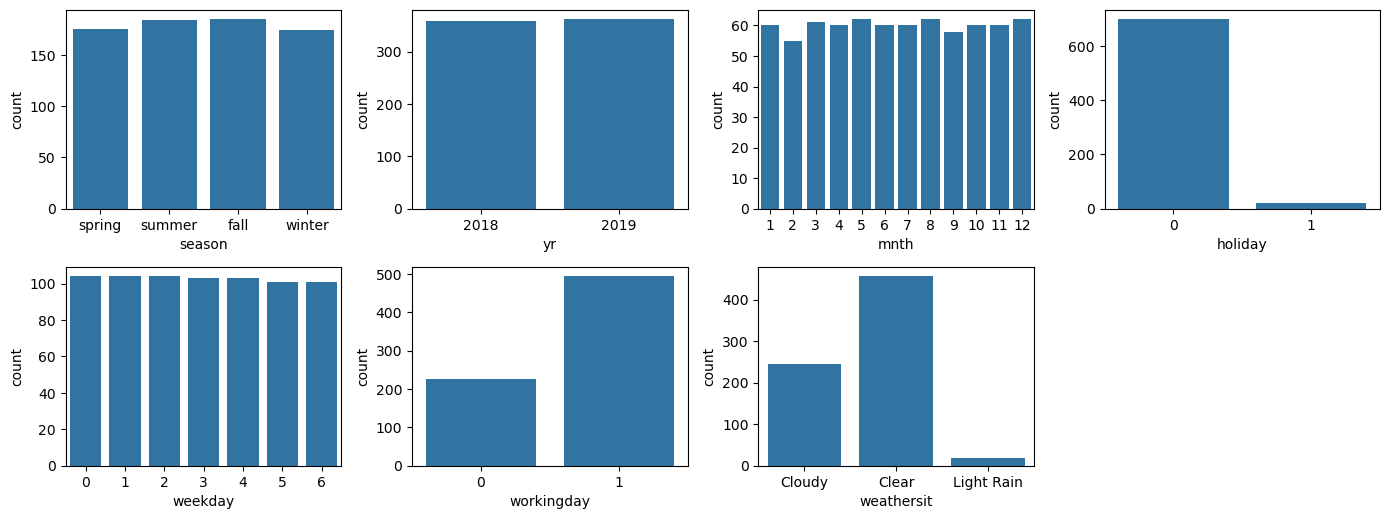

In [173]:
#### count plot for categorical columns
plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols):
    plt.subplot(4,4,i+1)
    sns.countplot(data=df, x=col)
    plt.tight_layout()
plt.show()

Observations:
> - no difference in count of seasons, year, month, weekday
> - majority of the rentals are from non holidays and working days, clear weather
> - no data for heavy rain weather situation

### bivariate analysis

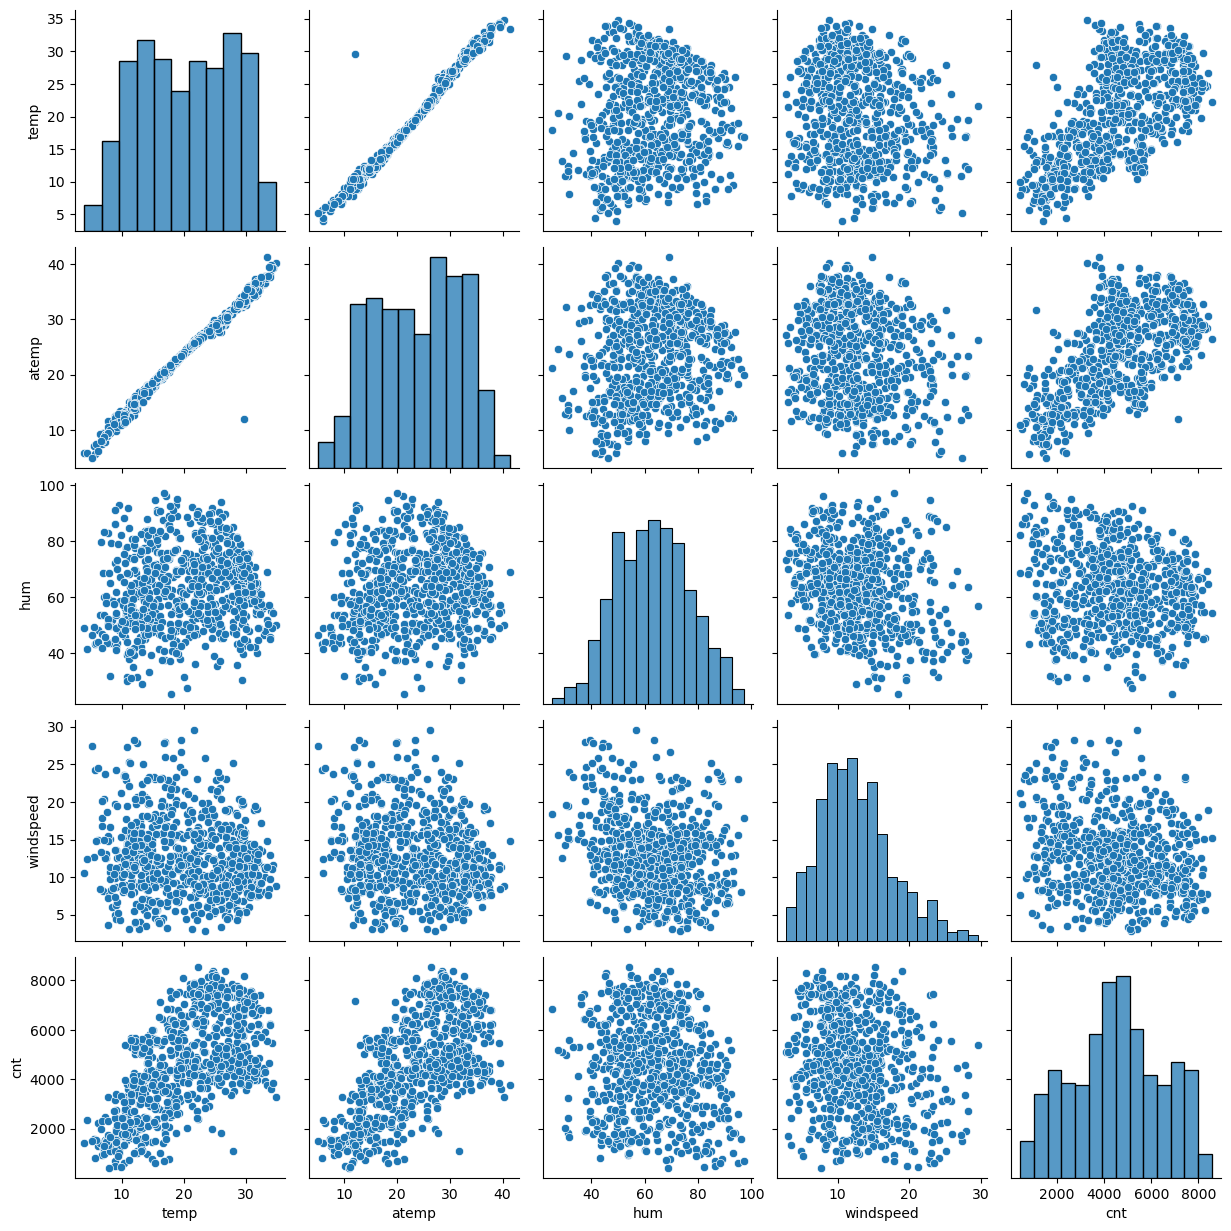

In [174]:
# between numerical columns
sns.pairplot(df[num_cols])
plt.show()

> - cnt column has linear relationship with temp, atemp columns
> - No visible correalation of cnt with hum and windspeed

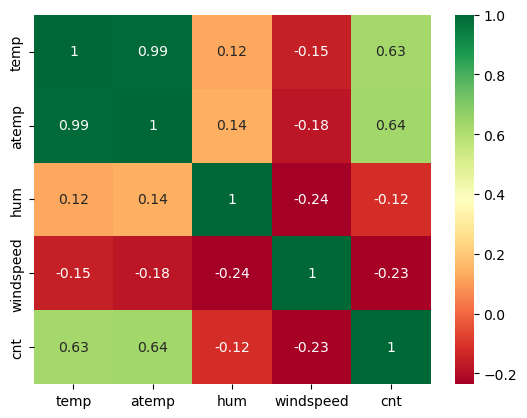

In [175]:
# heatmap for multi collinearity
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

- there is a strong correaltion between temp and atemp - need to check for multi collinearity
- with total count: 
    - strong positive correlation with temp, atemp
    - weak negative correaltion with humidity and windspeed

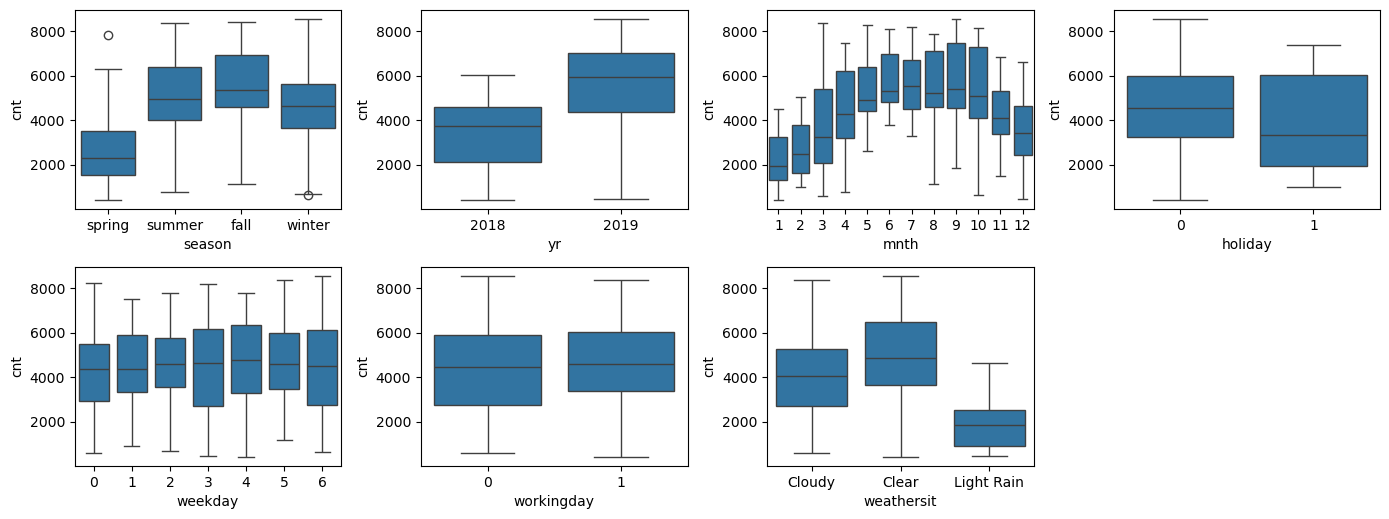

In [176]:
# target variable trend with categories
plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df, x=col, y='cnt')
    plt.tight_layout()
plt.show()

Observations:
- in fall season, rentals are high
- usage increased with year
- mid months has higher usage
- Non holidays has higher usage
- no effect of weekday and workingday on usage.
- more usage with clear and cloudy weather situation

# Data Preparation

#### creating dummies for category columns

In [177]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [178]:
# creating dummies with prefix
season = pd.get_dummies(df['season'], prefix='season', drop_first=True).astype(int)
yr = pd.get_dummies(df['yr'], prefix='yr', drop_first=True).astype(int)
mnth = pd.get_dummies(df['mnth'], prefix='mnth', drop_first=True).astype(int)
weekday = pd.get_dummies(df['weekday'], prefix='weekday', drop_first=True).astype(int)
weathersit = pd.get_dummies(df['weathersit'], prefix='weathersit', drop_first=True).astype(int)

In [179]:
# joining dummies and dropping original columns
df = pd.concat([df, season, yr, mnth, weekday, weathersit], axis=1)
df.drop(columns=['season', 'yr', 'mnth', 'weekday', 'weathersit'], inplace=True)
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                720 non-null    int64  
 1   workingday             720 non-null    int64  
 2   temp                   720 non-null    float64
 3   atemp                  720 non-null    float64
 4   hum                    720 non-null    float64
 5   windspeed              720 non-null    float64
 6   cnt                    720 non-null    int64  
 7   season_spring          720 non-null    int32  
 8   season_summer          720 non-null    int32  
 9   season_winter          720 non-null    int32  
 10  yr_2019                720 non-null    int32  
 11  mnth_2                 720 non-null    int32  
 12  mnth_3                 720 non-null    int32  
 13  mnth_4                 720 non-null    int32  
 14  mnth_5                 720 non-null    int32  
 15  mnth_6     

Data looks good for model building

### train test split

In [181]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [182]:
df_train.shape, df_test.shape

((504, 30), (216, 30))

### Scaling the features

In [183]:
scaler = MinMaxScaler()

In [184]:
df_train[num_cols]

,temp,atemp,hum,windspeed,cnt
424,19.919153,23.76855,61.5417,15.208129,4990
728,10.489153,11.58500,48.3333,23.500518,1796
479,19.543347,23.51585,42.7917,7.959064,6196
115,25.898347,29.70415,72.9167,21.875500,4400
580,32.526653,37.56335,61.3333,17.249686,6824
...,...,...,...,...,...
586,29.349153,33.39710,71.5833,16.000471,5786
56,11.582500,14.10960,53.7917,12.500257,1969
357,12.402500,14.96210,54.2500,12.750368,1011
83,10.830847,12.81560,49.5000,15.458575,2210


In [185]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [186]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
holiday,504.0,0.025794,0.158677,0.0,0.000000,0.000000,0.000000,1.0
workingday,504.0,0.678571,0.467489,0.0,0.000000,1.000000,1.000000,1.0
temp,504.0,0.534304,0.244838,0.0,0.321528,0.531565,0.752849,1.0
atemp,504.0,0.534275,0.232350,0.0,0.324197,0.544596,0.730422,1.0
hum,504.0,0.528455,0.195832,0.0,0.380484,0.525886,0.669575,1.0
windspeed,504.0,0.364800,0.193283,0.0,0.226983,0.342634,0.472320,1.0
cnt,504.0,0.513177,0.246313,0.0,0.337513,0.518012,0.703952,1.0
season_spring,504.0,0.240079,0.427556,0.0,0.000000,0.000000,0.000000,1.0
season_summer,504.0,0.251984,0.434584,0.0,0.000000,0.000000,1.000000,1.0
season_winter,504.0,0.248016,0.432290,0.0,0.000000,0.000000,0.000000,1.0


all values are in between 0 and 1, data looks good

# Model Building

In [187]:
# create X and y
y_train = df_train.pop('cnt')
X_train = df_train

### linear regression using statsmodel

In [188]:
# building initial model with all features
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     103.1
Date:                Tue, 28 May 2024   Prob (F-statistic):          3.39e-182
Time:                        23:28:36   Log-Likelihood:                 484.73
No. Observations:                 504   AIC:                            -911.5
Df Residuals:                     475   BIC:                            -789.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1947      0.041      4.695      0.000       0.113       0.276
holiday                  -0.0600      0.026     -2.330      0.020      -0.111      -0.009
workingday                0.0488      0.010      4.899      0.000       0.029       0.068
temp                      0.3525      0.141      2.506      0.013       0.076       0.629
atemp                     0.1638      0.137      1.193      0.233      -0.106       0.433
hum                      -0.1565      0.033     -4.727      0.000      -0.222      -0.091
windspeed                -0.1697      0.025     -6.882      0.000      -0.218      -0.121
season_spring            -0.0683      0.032     -2.118      0.035      -0.132      -0.005
season_summer             0.0179      0.029      0.617      0.537      -0.039       0.075
season_winter             0.1230      0.029      4.224      0.000       0.066       0.180
yr_2019                   0.2474      0.009     28.059      0.000       0.230       0.265
mnth_2                    0.0051      0.022      0.232      0.817      -0.038       0.049
mnth_3                    0.0596      0.026      2.331      0.020       0.009       0.110
mnth_4                    0.0456      0.037      1.231      0.219      -0.027       0.118
mnth_5                    0.0701      0.041      1.721      0.086      -0.010       0.150
mnth_6                    0.0358      0.043      0.837      0.403      -0.048       0.120
mnth_7                   -0.0165      0.048     -0.345      0.730      -0.110       0.077
mnth_8                    0.0413      0.046      0.900      0.368      -0.049       0.132
mnth_9                    0.0955      0.041      2.356      0.019       0.016       0.175
mnth_10                   0.0436      0.036      1.212      0.226      -0.027       0.114
mnth_11                  -0.0368      0.034     -1.094      0.275      -0.103       0.029
mnth_12                  -0.0228      0.027     -0.851      0.395      -0.075       0.030
weekday_1                -0.0116      0.011     -1.086      0.278      -0.033       0.009
weekday_2                -0.0173      0.012     -1.493      0.136      -0.040       0.005
weekday_3                -0.0020      0.012     -0.175      0.861      -0.025       0.021
weekday_4                 0.0074      0.012      0.629      0.529      -0.016       0.031
weekday_5                 0.0124      0.012      0.990      0.323      -0.012       0.037
weekday_6                 0.0668      0.016      4.248      0.000       0.036       0.098
weathersit_Cloudy        -0.0534      0.012     -4.548      0.000      -0.076      -0.030
weathersit_Light Rain    -0.1885      0.032     -5.822      0.000      -0.252      -0.125
==============================================================================
Omnibus:                       70.

obseravtions: 
- R-squared(0.859) and Adj R-sqaured(0.85) are close. 
- But there is a warning of multi collinearity, VIF will be used to check for those columns. 
- there are few features with high p values, which can be dropped

### VIF to checck for multicollinearity

In [189]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(by=['VIF'], ascending=False)

c:\Users\saimo\anaconda3\envs\trading\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,holiday,inf
25,weekday_5,inf
24,weekday_4,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
1,workingday,inf
2,temp,379.217634
3,atemp,352.061521
4,hum,18.037286


> - There is warning in VIF calculation too. will drop one column and re calculate.
> - weekday_3 will be dropped. high p value: 0.861, high vif: infinity

### defining functions for sm model and VIF as they will be used everytime

In [190]:
# get model with statsmodels library 
def get_sm_model(X):
    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y_train, X_sm).fit()
    return model_sm

# get VIF value to check for multi collinearity
def get_vif_df(X):
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values(by=['VIF'], ascending=False)

In [191]:
# dropping weekday_3 first
X_train = X_train.drop('weekday_3', axis=1)
get_sm_model(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     103.1
Date:                Tue, 28 May 2024   Prob (F-statistic):          3.39e-182
Time:                        23:28:37   Log-Likelihood:                 484.73
No. Observations:                 504   AIC:                            -911.5
Df Residuals:                     475   BIC:                            -789.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1947      0.041      4.695      0.000       0.113       0.276
holiday                  -0.0620      0.033     -1.879      0.061      -0.127       0.003
workingday                0.0468      0.016      2.999      0.003       0.016       0.077
temp                      0.3525      0.141      2.506      0.013       0.076       0.629
atemp                     0.1638      0.137      1.193      0.233      -0.106       0.433
hum                      -0.1565      0.033     -4.727      0.000      -0.222      -0.091
windspeed                -0.1697      0.025     -6.882      0.000      -0.218      -0.121
season_spring            -0.0683      0.032     -2.118      0.035      -0.132      -0.005
season_summer             0.0179      0.029      0.617      0.537      -0.039       0.075
season_winter             0.1230      0.029      4.224      0.000       0.066       0.180
yr_2019                   0.2474      0.009     28.059      0.000       0.230       0.265
mnth_2                    0.0051      0.022      0.232      0.817      -0.038       0.049
mnth_3                    0.0596      0.026      2.331      0.020       0.009       0.110
mnth_4                    0.0456      0.037      1.231      0.219      -0.027       0.118
mnth_5                    0.0701      0.041      1.721      0.086      -0.010       0.150
mnth_6                    0.0358      0.043      0.837      0.403      -0.048       0.120
mnth_7                   -0.0165      0.048     -0.345      0.730      -0.110       0.077
mnth_8                    0.0413      0.046      0.900      0.368      -0.049       0.132
mnth_9                    0.0955      0.041      2.356      0.019       0.016       0.175
mnth_10                   0.0436      0.036      1.212      0.226      -0.027       0.114
mnth_11                  -0.0368      0.034     -1.094      0.275      -0.103       0.029
mnth_12                  -0.0228      0.027     -0.851      0.395      -0.075       0.030
weekday_1                -0.0096      0.016     -0.590      0.555      -0.042       0.022
weekday_2                -0.0153      0.016     -0.974      0.331      -0.046       0.016
weekday_4                 0.0094      0.016      0.595      0.552      -0.022       0.041
weekday_5                 0.0144      0.016      0.872      0.384      -0.018       0.047
weekday_6                 0.0668      0.016      4.248      0.000       0.036       0.098
weathersit_Cloudy        -0.0534      0.012     -4.548      0.000      -0.076      -0.030
weathersit_Light Rain    -0.1885      0.032     -5.822      0.000      -0.252      -0.125
==============================================================================
Omnibus:                       70.670   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarqu

> - R-Squared and Adj. R-squared are about same. 
> - Error about multi collinearity is gone

In [192]:
# vif after droppign weekday_3
get_vif_df(X_train)

,feature,VIF
2,temp,379.217634
3,atemp,352.061521
4,hum,18.037286
7,season_summer,9.033197
1,workingday,8.730057
8,season_winter,8.663010
16,mnth_8,7.491910
13,mnth_5,7.236689
15,mnth_7,7.146447
14,mnth_6,6.217647


> -  no infite values in VIF like before.
> - temp and atemp have higher VIF. They had higher correlation as well

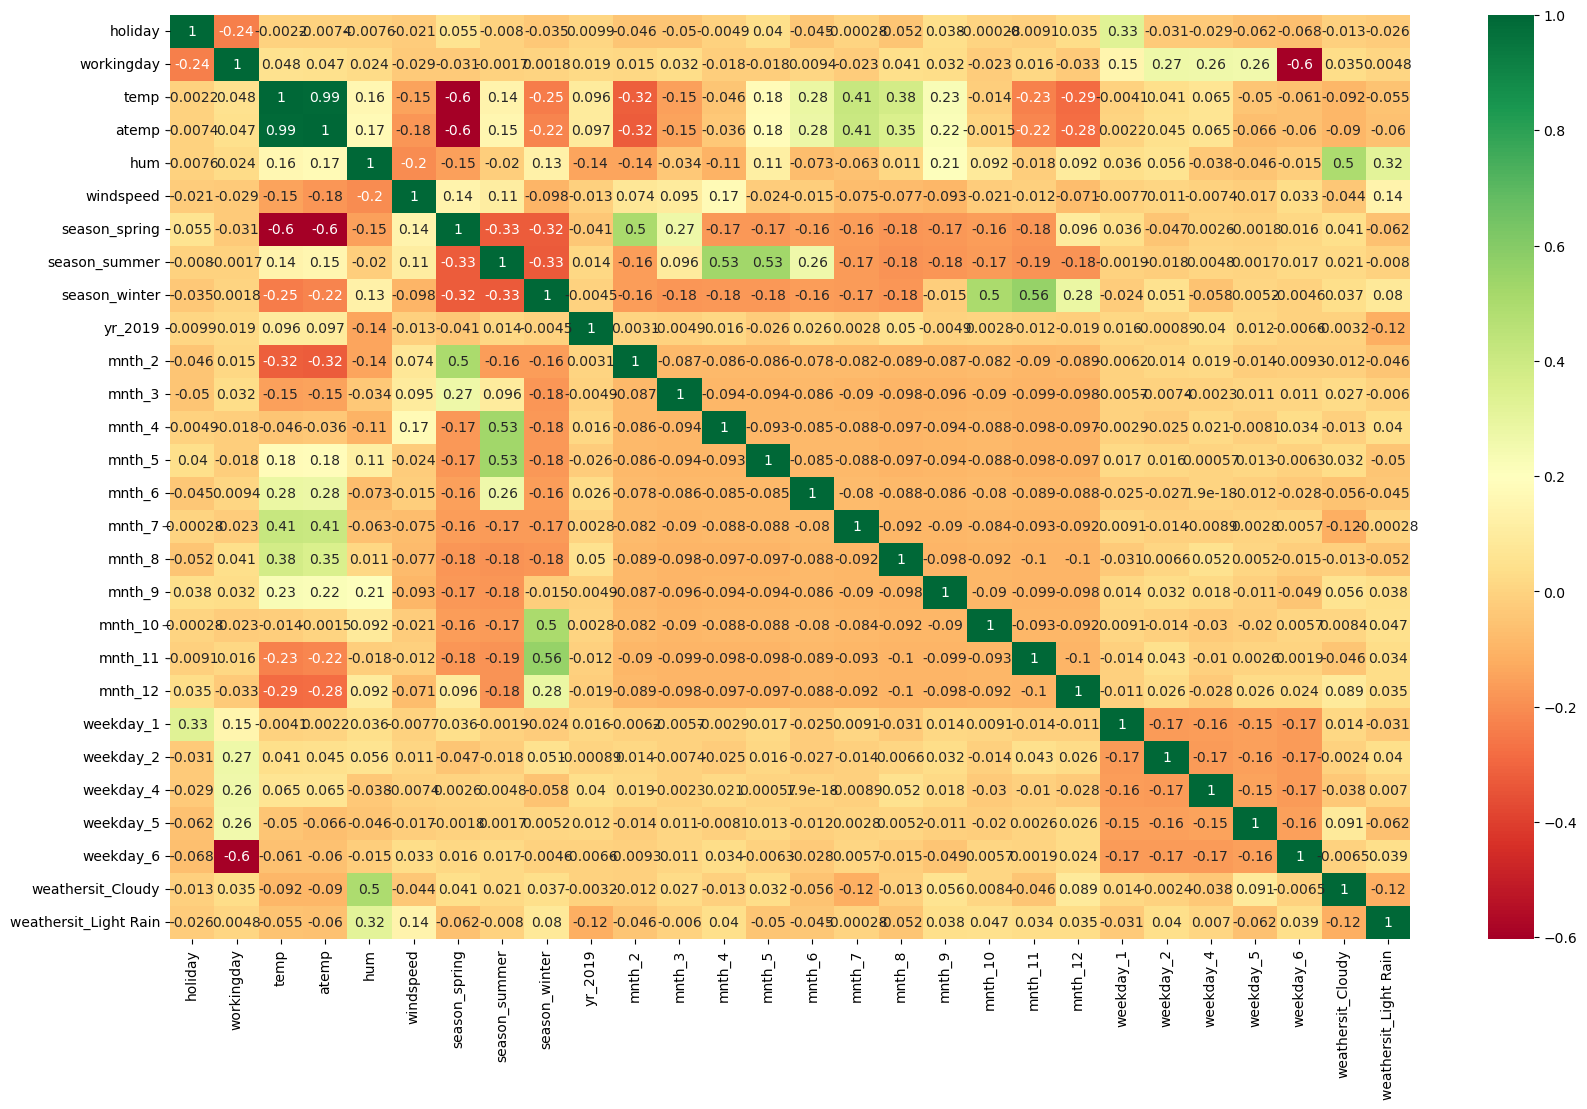

In [193]:
# verifying the correlations again after scaling
plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

> temp and atemp has high correlation. atemp will be dropped (which has higher p value between both).

In [194]:
# dropping atemp column and getting model
X_train = X_train.drop('atemp', axis=1)
get_sm_model(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     106.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          6.56e-183
Time:                        23:28:39   Log-Likelihood:                 483.98
No. Observations:                 504   AIC:                            -912.0
Df Residuals:                     476   BIC:                            -793.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1992      0.041      4.819      0.000       0.118       0.280
holiday                  -0.0648      0.033     -1.966      0.050      -0.129   -2.38e-05
workingday                0.0466      0.016      2.984      0.003       0.016       0.077
temp                      0.5106      0.047     10.809      0.000       0.418       0.603
hum                      -0.1542      0.033     -4.664      0.000      -0.219      -0.089
windspeed                -0.1766      0.024     -7.356      0.000      -0.224      -0.129
season_spring            -0.0674      0.032     -2.091      0.037      -0.131      -0.004
season_summer             0.0194      0.029      0.667      0.505      -0.038       0.076
season_winter             0.1237      0.029      4.249      0.000       0.067       0.181
yr_2019                   0.2476      0.009     28.074      0.000       0.230       0.265
mnth_2                    0.0053      0.022      0.239      0.811      -0.038       0.049
mnth_3                    0.0600      0.026      2.346      0.019       0.010       0.110
mnth_4                    0.0466      0.037      1.258      0.209      -0.026       0.119
mnth_5                    0.0690      0.041      1.695      0.091      -0.011       0.149
mnth_6                    0.0337      0.043      0.787      0.432      -0.050       0.118
mnth_7                   -0.0182      0.048     -0.381      0.703      -0.112       0.076
mnth_8                    0.0370      0.046      0.809      0.419      -0.053       0.127
mnth_9                    0.0939      0.041      2.318      0.021       0.014       0.174
mnth_10                   0.0447      0.036      1.240      0.216      -0.026       0.115
mnth_11                  -0.0356      0.034     -1.057      0.291      -0.102       0.031
mnth_12                  -0.0216      0.027     -0.807      0.420      -0.074       0.031
weekday_1                -0.0089      0.016     -0.548      0.584      -0.041       0.023
weekday_2                -0.0151      0.016     -0.960      0.338      -0.046       0.016
weekday_4                 0.0095      0.016      0.595      0.552      -0.022       0.041
weekday_5                 0.0127      0.016      0.771      0.441      -0.020       0.045
weekday_6                 0.0665      0.016      4.231      0.000       0.036       0.097
weathersit_Cloudy        -0.0539      0.012     -4.590      0.000      -0.077      -0.031
weathersit_Light Rain    -0.1904      0.032     -5.887      0.000      -0.254      -0.127
==============================================================================
Omnibus:                       70.501   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.222
Skew:                          -0.713   Prob(JB):       

> - R-Squared(0.858) and Adj. R-squared(0.85) are about same as intial after dropping
> - Before dropping more columns manually, RFE will be used to automate the process for few columns and manual approach will be used at the end if required.

### Feature selection using mixed approach : Automated (RFE) + Manual (P value + VIF)

In [195]:
len(X_train.columns)

27

> 15 columns out of 27 columns will be selected automatically using RFE. After that manual approach will be used

### RFE for feature elimination

In [196]:
# defining RFE
rfe = RFE(LinearRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)

# data frame for seeing the ranking
rfe_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['feature','is_important', 'ranking'])
rfe_df = rfe_df.sort_values(by=['ranking','is_important']).reset_index(drop=True)
rfe_df

,feature,is_important,ranking
0,holiday,True,1
1,temp,True,1
2,hum,True,1
3,windspeed,True,1
4,season_spring,True,1
5,season_winter,True,1
6,yr_2019,True,1
7,mnth_3,True,1
8,mnth_4,True,1
9,mnth_5,True,1


In [197]:
final_cols = list(rfe_df[rfe_df['is_important'] == True]['feature'])
final_cols

['holiday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'yr_2019',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weathersit_Light Rain']

these features will be used for further model building

In [198]:
# X_train = X_train[final_cols]
get_sm_model(X_train[final_cols]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.69e-186
Time:                        23:28:39   Log-Likelihood:                 461.42
No. Observations:                 504   AIC:                            -890.8
Df Residuals:                     488   BIC:                            -823.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2622      0.030      8.707      0.000       0.203       0.321
holiday                  -0.1155      0.028     -4.132      0.000      -0.170      -0.061
temp                      0.5196      0.033     15.721      0.000       0.455       0.585
hum                      -0.2477      0.026     -9.475      0.000      -0.299      -0.196
windspeed                -0.1944      0.024     -7.951      0.000      -0.242      -0.146
season_spring            -0.0636      0.021     -3.050      0.002      -0.105      -0.023
season_winter             0.1055      0.020      5.394      0.000       0.067       0.144
yr_2019                   0.2457      0.009     27.382      0.000       0.228       0.263
mnth_3                    0.0764      0.017      4.441      0.000       0.043       0.110
mnth_4                    0.0746      0.021      3.490      0.001       0.033       0.117
mnth_5                    0.1025      0.020      5.022      0.000       0.062       0.143
mnth_6                    0.0549      0.021      2.577      0.010       0.013       0.097
mnth_8                    0.0493      0.020      2.453      0.015       0.010       0.089
mnth_9                    0.1118      0.019      5.918      0.000       0.075       0.149
mnth_10                   0.0756      0.020      3.833      0.000       0.037       0.114
weathersit_Light Rain    -0.1284      0.031     -4.208      0.000      -0.188      -0.068
==============================================================================
Omnibus:                       75.110   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.921
Skew:                          -0.793   Prob(JB):                     1.27e-37
Kurtosis:                       5.361   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
get_vif_df(X_train[final_cols])

,feature,VIF
1,temp,10.159360
2,hum,9.794012
3,windspeed,4.585112
5,season_winter,2.986262
4,season_spring,2.809886
6,yr_2019,2.091640
11,mnth_8,1.889426
9,mnth_5,1.726325
10,mnth_6,1.635049
8,mnth_4,1.623584


> - R-Squared(0.845) and Adj. R-squared(0.84) are about same as intial after using RFE and dropping features. 
> - After dropping 12 columns, only 0.01 decrease observed in R-Squared value which is good.
> - All p values are below 0.05. All are significant.
> - only temp VIF is above 10.

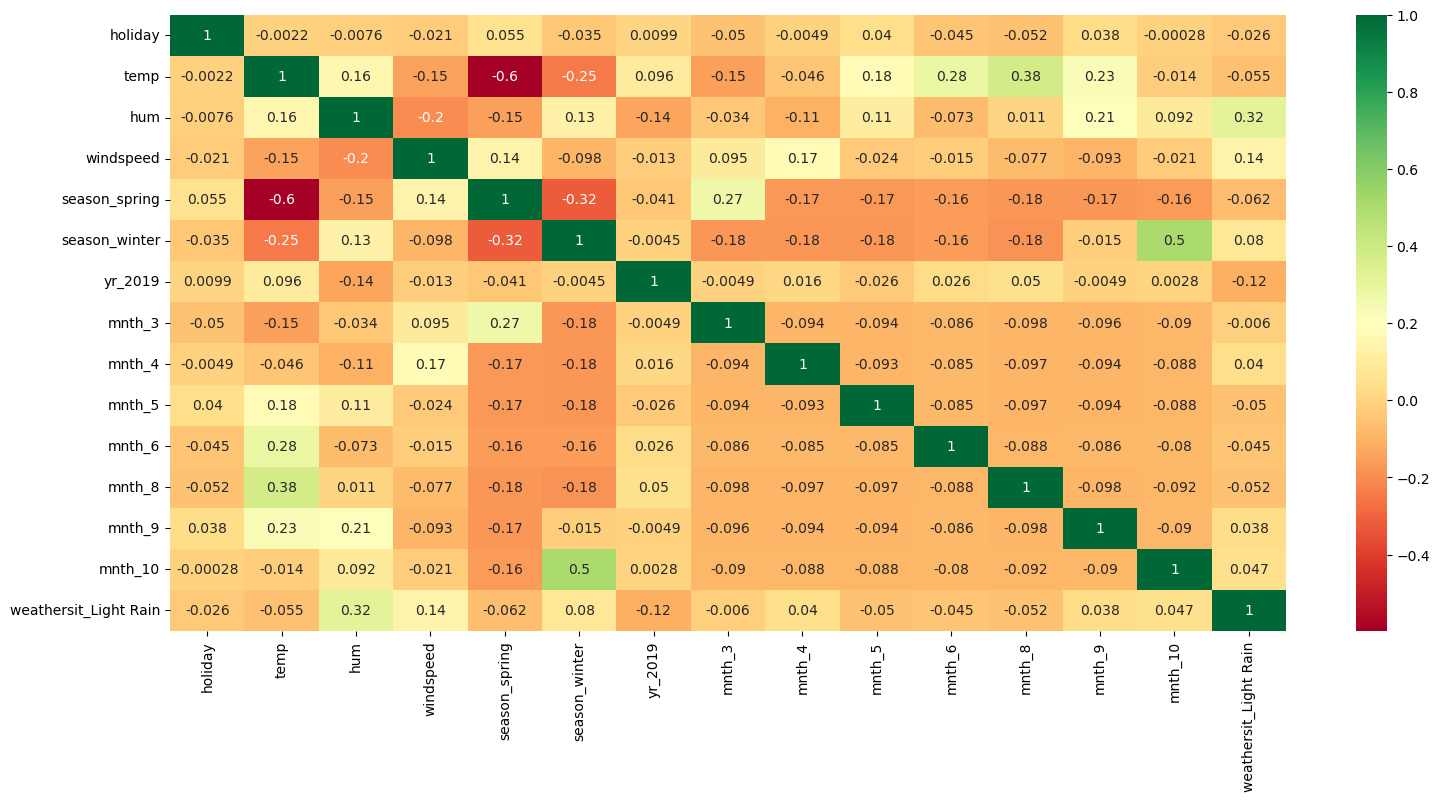

In [200]:
# checking correaltion for final features
plt.figure(figsize=(18,8))
sns.heatmap(X_train[final_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

> - Season_spring and temp has high correaltion. season_spring will be dropped (which has higher p value between both).
> - This may reduce VIF value on temp.

In [201]:
# dropping season_spring and checking model summary
final_cols.remove('season_spring')
get_sm_model(X_train[final_cols]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     186.3
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.19e-185
Time:                        23:28:40   Log-Likelihood:                 456.66
No. Observations:                 504   AIC:                            -883.3
Df Residuals:                     489   BIC:                            -820.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1984      0.022      9.080      0.000       0.155       0.241
holiday                  -0.1196      0.028     -4.251      0.000      -0.175      -0.064
temp                      0.5871      0.025     23.726      0.000       0.539       0.636
hum                      -0.2571      0.026     -9.817      0.000      -0.309      -0.206
windspeed                -0.2004      0.025     -8.156      0.000      -0.249      -0.152
season_winter             0.1488      0.014     10.958      0.000       0.122       0.175
yr_2019                   0.2443      0.009     27.034      0.000       0.227       0.262
mnth_3                    0.0810      0.017      4.686      0.000       0.047       0.115
mnth_4                    0.1121      0.018      6.363      0.000       0.077       0.147
mnth_5                    0.1292      0.019      6.954      0.000       0.093       0.166
mnth_6                    0.0730      0.021      3.539      0.000       0.032       0.114
mnth_8                    0.0650      0.020      3.317      0.001       0.026       0.104
mnth_9                    0.1257      0.018      6.806      0.000       0.089       0.162
mnth_10                   0.0686      0.020      3.473      0.001       0.030       0.107
weathersit_Light Rain    -0.1153      0.030     -3.785      0.000      -0.175      -0.055
==============================================================================
Omnibus:                       59.840   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.147
Skew:                          -0.683   Prob(JB):                     8.14e-27
Kurtosis:                       4.964   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
get_vif_df(X_train[final_cols])

,feature,VIF
1,temp,8.824267
2,hum,6.812807
3,windspeed,3.436094
4,season_winter,2.189569
5,yr_2019,2.010110
10,mnth_8,1.783604
9,mnth_6,1.554435
12,mnth_10,1.516760
8,mnth_5,1.499924
11,mnth_9,1.495086


> - R-Squared(0.842) and Adj. R-squared(0.838) are about same as intial after using RFE and dropping features based on p-value, VIF, correlation.
> - R-Squared and Adj. R-Squared are close.
> - All p values are below 0.05. All remaining terms are significant.
> - All VIF values are below 5, except temp and hum which indicates low multicollinearity among features.

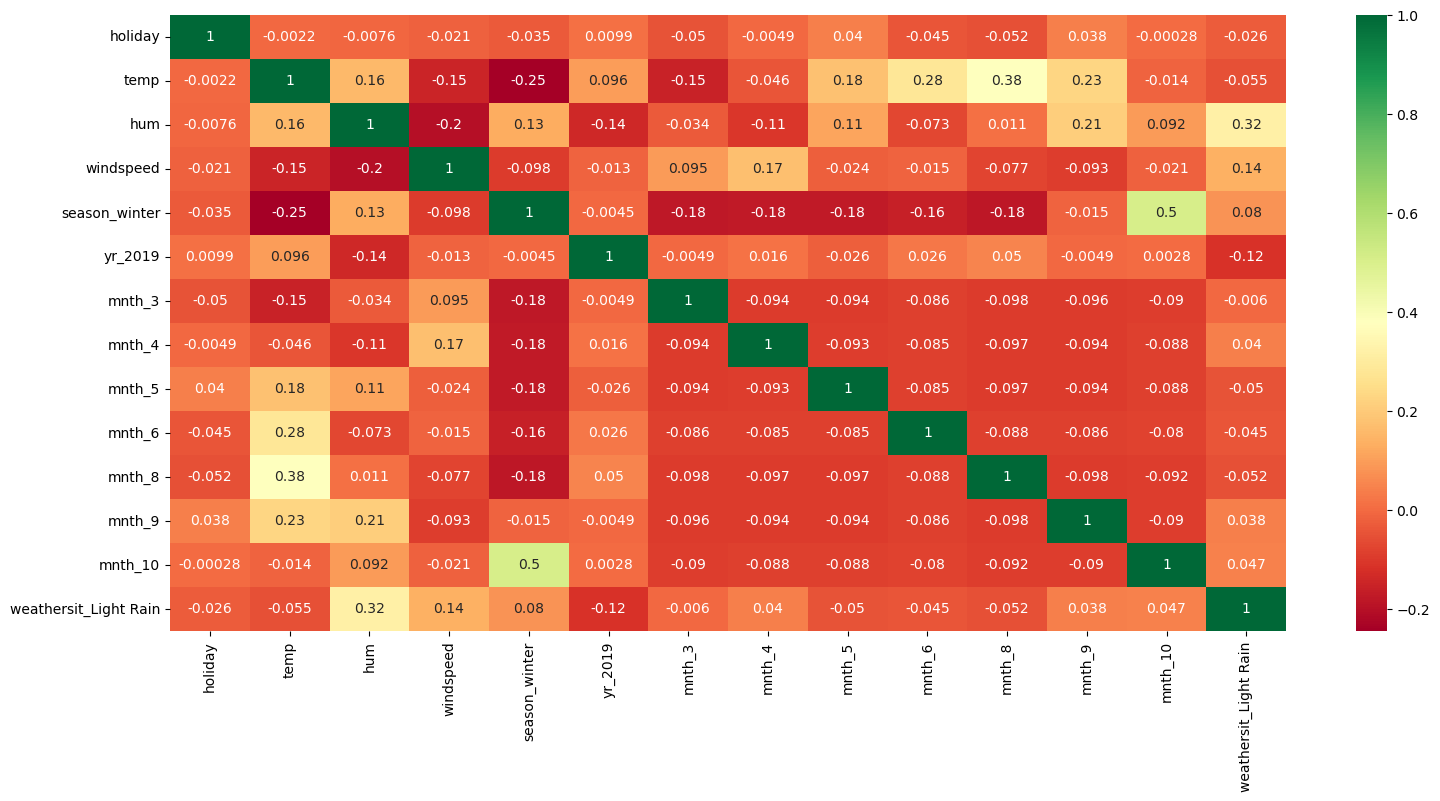

In [203]:
# checking correlation for final features
plt.figure(figsize=(18,8))
sns.heatmap(X_train[final_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

> no strong correlation observed among remianing features

# Final model verification

In [204]:
## model
X_train = X_train[final_cols]
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     186.3
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.19e-185
Time:                        23:28:40   Log-Likelihood:                 456.66
No. Observations:                 504   AIC:                            -883.3
Df Residuals:                     489   BIC:                            -820.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1984      0.022      9.080      0.000       0.155       0.241
holiday                  -0.1196      0.028     -4.251      0.000      -0.175      -0.064
temp                      0.5871      0.025     23.726      0.000       0.539       0.636
hum                      -0.2571      0.026     -9.817      0.000      -0.309      -0.206
windspeed                -0.2004      0.025     -8.156      0.000      -0.249      -0.152
season_winter             0.1488      0.014     10.958      0.000       0.122       0.175
yr_2019                   0.2443      0.009     27.034      0.000       0.227       0.262
mnth_3                    0.0810      0.017      4.686      0.000       0.047       0.115
mnth_4                    0.1121      0.018      6.363      0.000       0.077       0.147
mnth_5                    0.1292      0.019      6.954      0.000       0.093       0.166
mnth_6                    0.0730      0.021      3.539      0.000       0.032       0.114
mnth_8                    0.0650      0.020      3.317      0.001       0.026       0.104
mnth_9                    0.1257      0.018      6.806      0.000       0.089       0.162
mnth_10                   0.0686      0.020      3.473      0.001       0.030       0.107
weathersit_Light Rain    -0.1153      0.030     -3.785      0.000      -0.175      -0.055
==============================================================================
Omnibus:                       59.840   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.147
Skew:                          -0.683   Prob(JB):                     8.14e-27
Kurtosis:                       4.964   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> - All p values are below 0.05. - indicates reject null hypothesis, all terms are significant. 
> - R-Squared value (0.842) is good.
> - Adjusted R-squared (0.838) is very close - indicates low chance of overfitting 

#### model prediction on training data

In [206]:
# r2 check on training data
y_pred_train = model.predict(X_train_sm)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training data R-squared is {round(r2_train,3)}") #type:ignore

Training data R-squared is 0.842


In [207]:
# R-squared adjusted on training set using the formulae - it is matching with the one provided by statsmodel.
r2_adj_train = 1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(f"Training data Adj. R-squared is {round(r2_adj_train,3)}") #type:ignore

Training data Adj. R-squared is 0.838


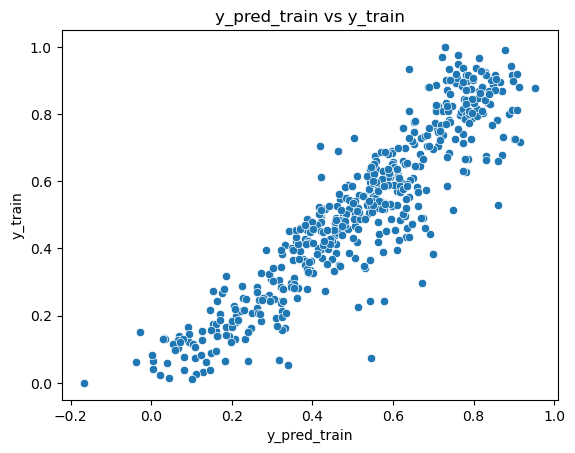

In [208]:
sns.scatterplot(x=y_pred_train, y=y_train)
plt.title('y_pred_train vs y_train')
plt.xlabel('y_pred_train')
plt.ylabel('y_train')
plt.show()

#### Residual analysis

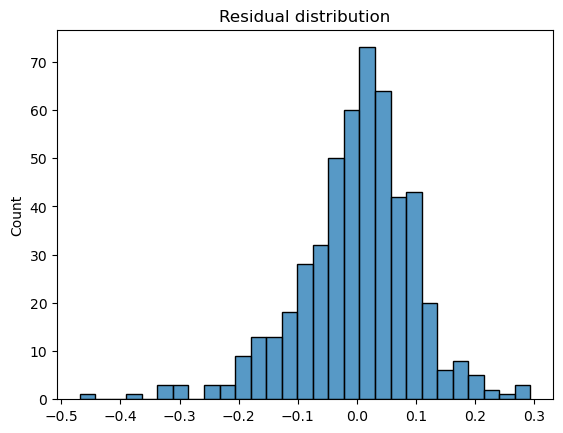

In [209]:
sns.histplot(y_train - y_pred_train)
plt.title('Residual distribution')
plt.show()

> residuals looks like normal distribution, but not perfectly normal

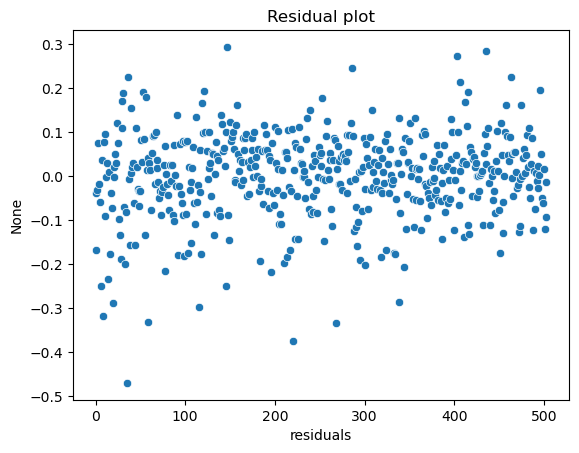

In [210]:
res = y_train - y_pred_train
sns.scatterplot(y=res, x=list(range(len(res))))
plt.title('Residual plot')
plt.xlabel('residuals')
plt.show()

> they look like random, no visible pattern

### Model Evaluation on test data

In [211]:
# scaling df_test data - using the scaling fit function on training set
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [212]:
# get X and y on test set
X_test = df_test[final_cols]
y_test = df_test['cnt']

In [213]:
# adding constant on test data to be conssitent with trained model
X_test_sm = sm.add_constant(X_test)

In [214]:
# r2 check on training data
y_pred_test = model.predict(X_test_sm)
r2_test = r2_score(y_test, y_pred_test)
print(f"Test data R-squared is {round(r2_test,3)}") #type:ignore

Test data R-squared is 0.824


In [215]:
# R-squared adjusted on test set using the formulae
r2_adj_test = 1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Test data Adj. R-squared is {round(r2_adj_test,3)}") #type:ignore

Test data Adj. R-squared is 0.812


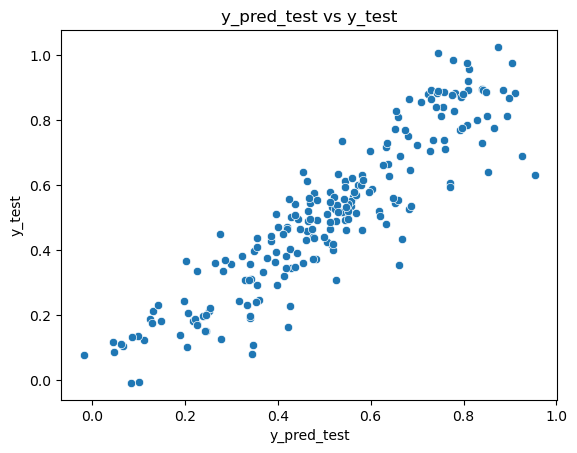

In [216]:
sns.scatterplot(x=y_pred_test, y=y_test)
plt.title('y_pred_test vs y_test')
plt.xlabel('y_pred_test')
plt.ylabel('y_test')
plt.show()

## Summary

#### metrics

In [219]:
print(f"Traing data metrics:")
print(f"R-squared       : {round(r2_train,3)}") #type:ignore
print(f"Adj. R-squared  : {round(r2_adj_train,3)}") #type:ignore
print("------------------")
print(f"Test data metrics:")
print(f"R-squared       : {round(r2_test,3)}") #type:ignore
print(f"Adj. R-squared  : {round(r2_adj_test,3)}") #type:ignore

Traing data metrics:
R-squared       : 0.842
Adj. R-squared  : 0.838
------------------
Test data metrics:
R-squared       : 0.824
Adj. R-squared  : 0.812


> Both train and test sets shows good R2 and R2 adj values - which shows confidence on this model

#### final model coefficeints

In [220]:
model.params.sort_values(ascending=False)

temp                     0.587136
yr_2019                  0.244342
const                    0.198394
season_winter            0.148751
mnth_5                   0.129213
mnth_9                   0.125724
mnth_4                   0.112094
mnth_3                   0.080959
mnth_6                   0.073022
mnth_10                  0.068575
mnth_8                   0.065016
weathersit_Light Rain   -0.115322
holiday                 -0.119628
windspeed               -0.200412
hum                     -0.257064
dtype: float64

### Inferences 
> - temperature has strong influence (0.587) -  high temperature indicates high demand.
> - humidity and windspeed also plays next major role - negetively related
> - year is important - demand increases with each year
> - months 3 to 10 are important, winter season(months 10-12) is also important - that means demand varies by month.
> - light rain weather situation decreases the demand
> - holiday decreases the demand

> these observattions matches with observations from bivariate analsysis also - shows higher confidence in the model

The END

Thank You